# Центральная предельная теорема своими руками

<div class="alert alert-block alert-info">
<b>План работы: </b> 
    
1. Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 

2. Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

3. Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

4. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

5. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

6. Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?
</div>





## Логнормальное распределение

<div class="alert alert-block alert-info">
<b>Комментарий студента: </b> 
В качестве непрерывного распределения было взято логонормальное распределение, которое используется для описания распределения денежных средств (в основном в банковской сфере). Более подробное описание можно посмотреть по ссылкам:

https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

http://mathhelpplanet.com/static.php?p=osnovnye-zakony-raspredeleniya-nepreryvnyh-sluchainyh-velichin
</div>

## Гистограмма логнормального распределения для выборки n=1000

Импортируем необходимые библиотеки:

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib inline

<div class="alert alert-block alert-info">
<b>Комментарий студента: </b> 
Сгенерируем из логнормального распределения выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины.

Обратим внимание, что scipy.stats.lognorm считает плотность логнормального распределения по формуле 

$f(x)=\frac{1}{x\sigma\sqrt{2\pi}}\exp\!\left(-\frac{(\ln{x})^2}{2\sigma^2}\right)$, т.е для $\mu = 0$, поэтому в функцию передается только один параметр - $\sigma$.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
</div>

Сгенерируем выборку объема 1000 из логнормального распределения, зададим сигма = 0.5:

In [2]:
lognorm_rv = sts.lognorm(0.5)
sample = lognorm_rv.rvs(1000)

Построим гистограмму по выборке, а затем поверх нее построим теоретическую функцию плотности вероятности:

Text(0, 0.5, 'fraction of samples / $f(x)$')

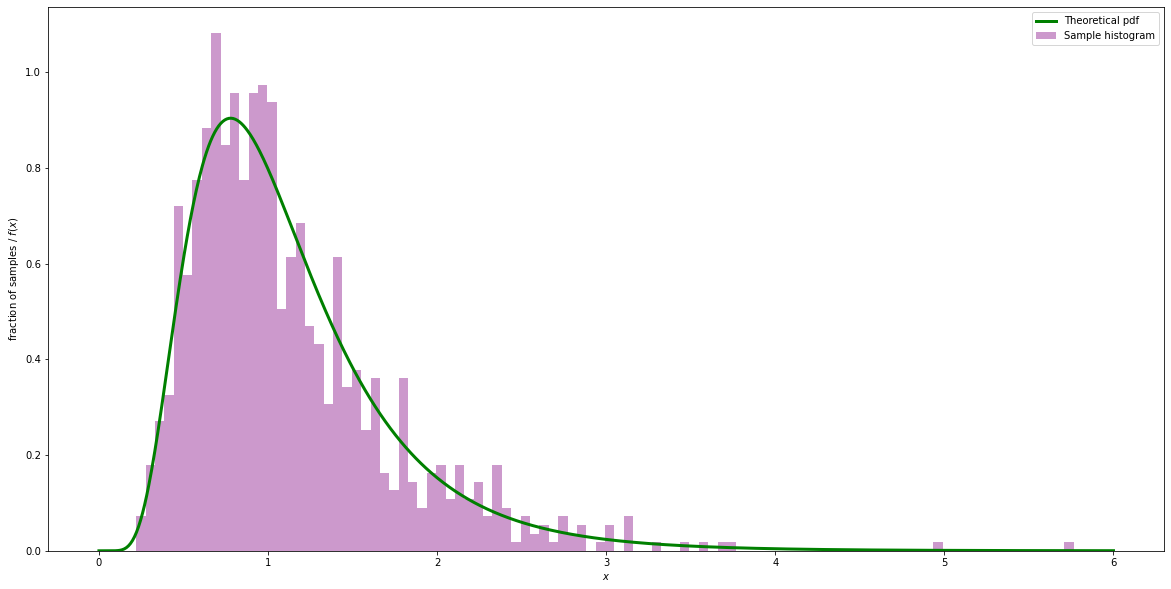

In [3]:
plt.figure(figsize=(20,10))
plt.hist(sample, color='purple', bins=100, density=True, histtype='stepfilled', alpha=0.4, label='Sample histogram')
x = np.linspace(0,6,1000)
plt.plot(x, lognorm_rv.pdf(x),'g',lw=3, label='Theoretical pdf')
plt.legend(loc='best', frameon=True)
plt.xlabel('$x$')
plt.ylabel('fraction of samples / $f(x)$')

<div class="alert alert-block alert-info">
<b>Комментарий студента: </b> 
Получившаяся гистограмма по форме достаточно близко повторяет функцию плотности вероятности логнормального распределения. 
Это ожидаемый результат.
</div>

## Оценка распределения выборочного среднего случайной величины при разных объёмах выборок

<div class="alert alert-block alert-info">
<b>Комментарий студента: </b> 
Согласно Центральной Предельной Теореме выборочные средние $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mathbb{E}X, \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

Для логнормального распределения матожидание равно ${\mathbb  {E}}X=e^{{\mu +{\sigma ^{2} \over 2}}}$, а дисперсия - ${\mathrm  {D}}X=\left(e^{{\sigma ^{2}}}-1\right)e^{{2\mu +\sigma ^{2}}}$ (напомним, что $\mu$,$\sigma$ в данной формуле - параметры нормального распределения случайной величины $Y$, такой, что $X=e^Y$).

Тогда распределение выборочных средних логнормального распределения будет приближаться нормальным распределением 

$N$($e^{{\mu +{\sigma ^{2} \over 2}}}$, $\frac{\left(e^{{\sigma ^{2}}}-1\right)e^{{2\mu +\sigma ^{2}}}}{n}$).

При этом выше мы обозначили, что в данном случае мы приняли $\mu=0$ и $\sigma=0.5$. Тогда матожидание нормального распределения, приближающего распределение выборочных средних, будет равно $e^{{0 +{0.5 ^{2} \over 2}}}\approx1.133$, а дисперсия будет равна $\frac{\left(e^{{0.5 ^{2}}}-1\right)e^{{2\cdot0 +0.5 ^{2}}}}{n}\approx\frac{0.365}{n}$. 

А т.к. в scipy.stats.norm распределение задается не через дисперсию, а через среднеквадратичное отклонение, то будем подставлять $\sqrt{DX/n}$, т.е. $\sqrt{\frac{0.365}{n}}$.
</div>

Оценим распределение выборочного среднего нашей случайной величины при разных объёмах выборок. Для этого построим гистограммы распределений выборочных средних для различных n, посчитаем значения параметров нормальных распределений, которыми, согласно ЦПТ, приближается распределение выборочных средних, и поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения. 

<div class="alert alert-block alert-info">
<b>Комментарий студента: </b> 
Необходимо сделать следующее:

- Cгенерировать выборочные средние по выборке объема n;
- Рассчитать теоретическую плотность вероятности для нормального распределения, приближающего распределение выборочных средних;
- Построить гистограмму выборочных средних и наложим на нее теоретическую оценку плотности вероятности нормального распределения.
</div>

In [4]:
def generate_pdf(n): 
    lognorm_rv = sts.lognorm(0.5)
    means = []
    for i in range(1000):
        sample = lognorm_rv.rvs(n)           
        sample_mean = sum(sample)/n          
        means.append(sample_mean)
    mean_of_sample_mean = sum(means)/1000    
    mu = 1.133                               
    sigma = (0.365/n)**0.5                  
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,3,1000)
    pdf = norm_rv.pdf(x)  
    plt.figure(figsize=(20,10))
    plt.hist(means, color='purple', bins=100, density=True, alpha=0.4, label='Sample mean')
    plt.plot(x, pdf, 'g', lw=3, label='Normal pdf')
    plt.xlabel('$x$')
    plt.ylabel('fraction of samples / $f(x)$')
    plt.legend(loc='best', frameon=True)
    plt.title("n = %d, mean_of_sample_mean = '%.3f'" % (n, mean_of_sample_mean))
    plt.show()

Сделаем графики для различных n:

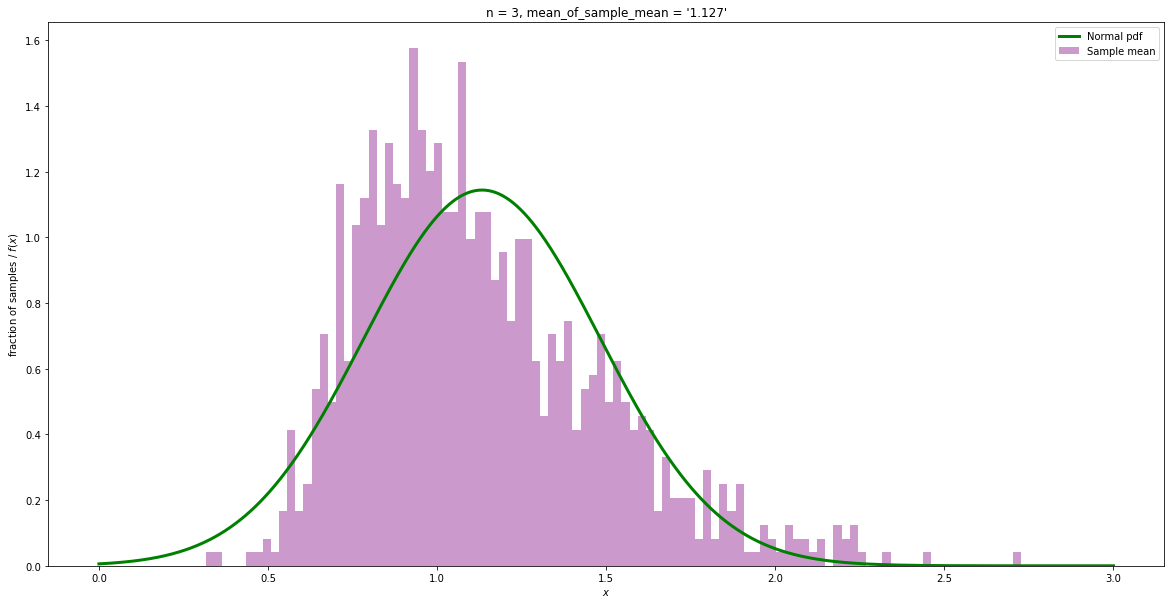

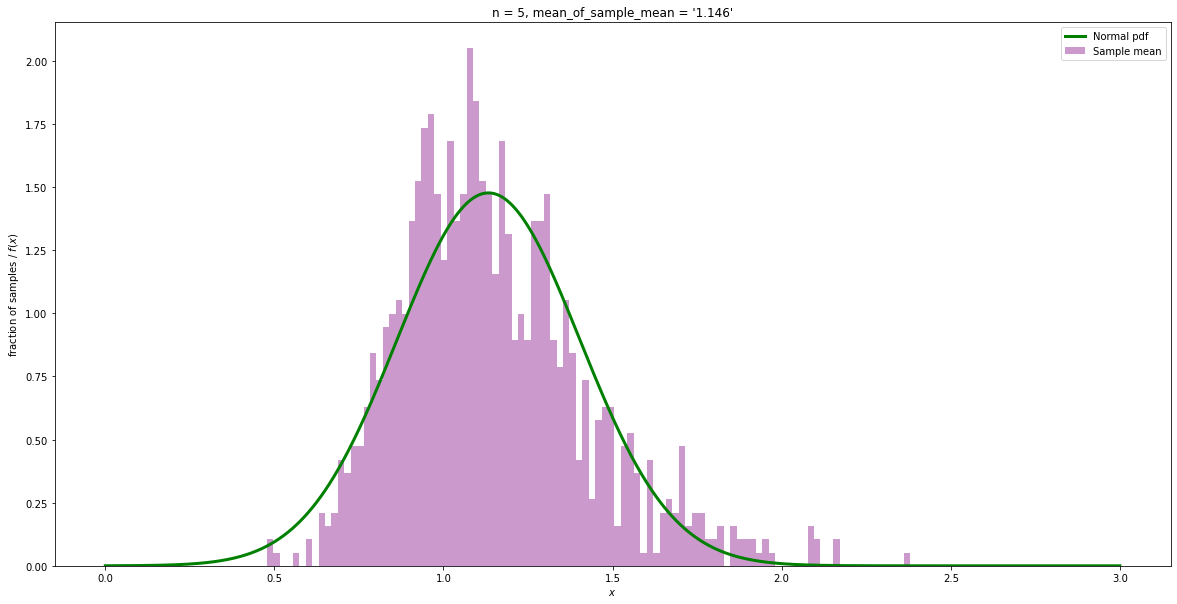

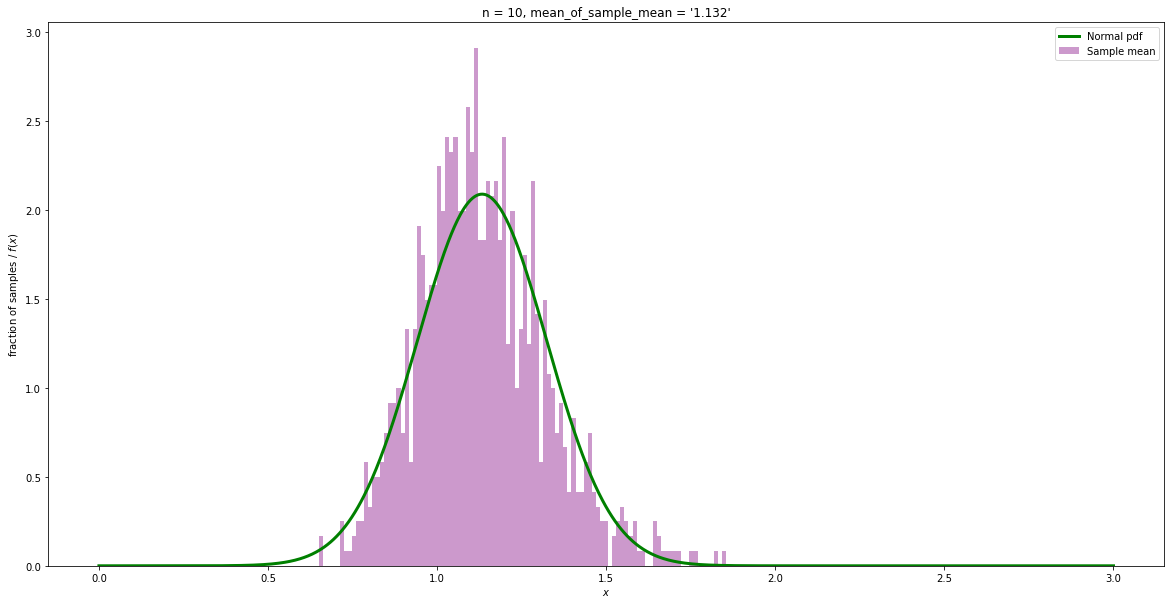

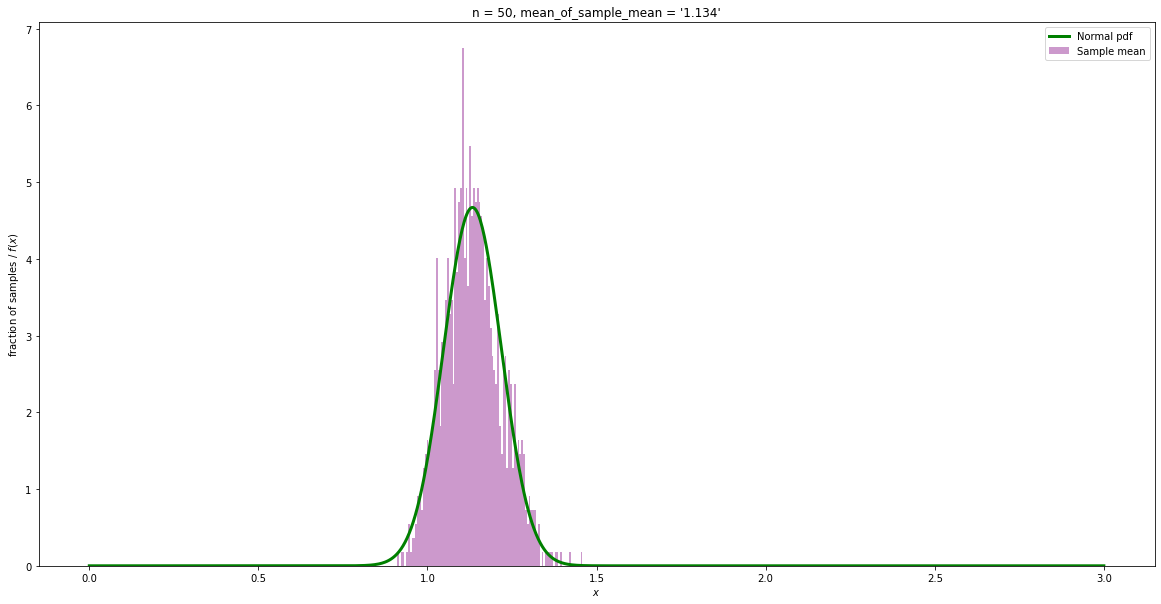

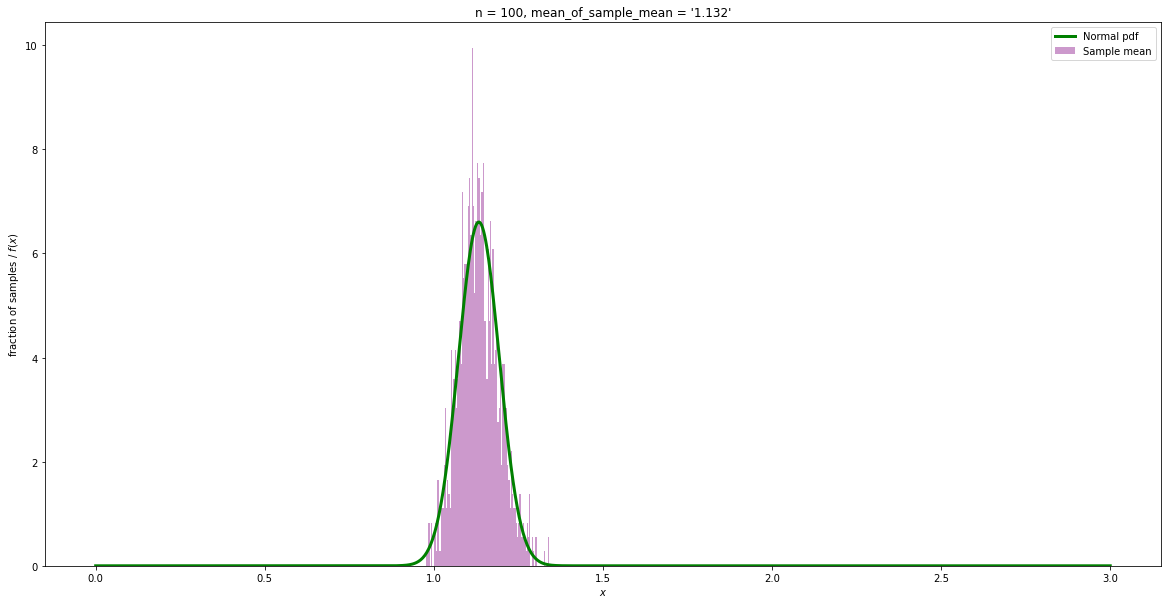

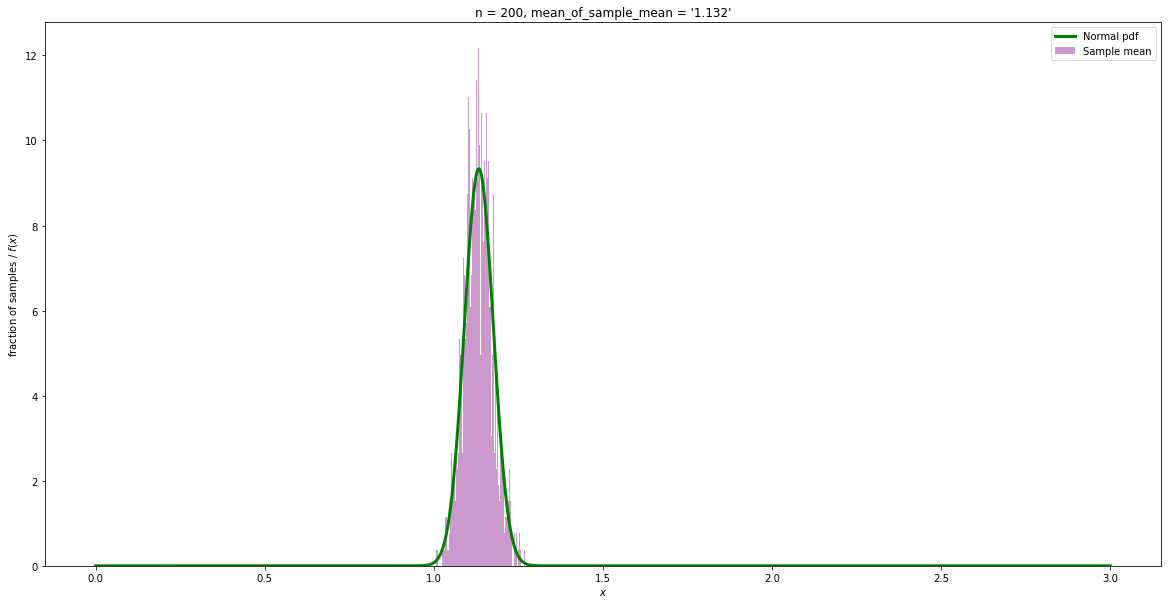

In [5]:
for n in [3, 5, 10, 50, 100, 200]:
    generate_pdf(n)

<div class="alert alert-block alert-info">
<b>Комментарий студента: </b> 
Из графиков видно, что при увеличении числа n выборочные средние все гуще группируются вокруг матожидания нашей случайной величины ${\mathbb  {E}}X\approx1.133$, и разброс их значений становится все меньше. Если сравнивать с величиной $1.133$ средние выборочных средних при различных n, то видно, что при маленьких n разница между ними заметна (есть средние в $1.117$, $1.137$ и $1.143$), а при больших n средние выборочных средних скачут вокруг $1.133$ (есть средние в $1.131$ и $1.135$). 

Также при увеличении числа n гистограмма все лучше приближается нормальным распределением $N(\mathbb{E}X, \frac{\mathbb{D}X}{n})$. 

Таким образом, это наглядное подтверждение работы Центральной Предельной Теоремы.
</div>